In [1]:
from notebook.services.config import ConfigManager
cfgm = ConfigManager()
cfgm.update('livereveal', {
              'theme': 'simple',
              'transition': 'convex',
              'start_slideshow_at': 'selected'
});

In [2]:
from IPython.core.display import HTML
HTML("""<style>
.answers { 
    visibility: hidden;
}
</style>""")

# Python Analysis Evaluation
Author: Barron H. Henderson

In [3]:
# Prepare my slides
%pylab inline
%cd working

Populating the interactive namespace from numpy and matplotlib
/Users/barronh/Development/RAQMSandPython/working


# Process AQS for evaluation

1. Download annual zip file(s)
2. Unzip
3. Use sed, grep, or awk to get spatial/temporal subset
4. Reshape data
    1. Missing data should be masked
    2. Dimensions (time, point)
    

# CHECK POINT 

1. What do you think the dimensions should be for AQS observations?
    - 

2. What meta-data should be present?
    - 
    

# Getting AQS Observations

1. Get AQS observations
    1. Raw outputs from AQS website
    2. Representational State Transfer - good for small amounts of data
2. REST format was having problems due to its transition.

# Raw outputs

1. Download directly or download inline
2. A csv file has been prepared with data just for the 2006-07-31 to 2006-08-10

In [7]:
from urllib.request import urlretrieve, url2pathname
import os
urlpath = 'ftp://data.as.essie.ufl.edu/pub/exch/CMAQandPython/aqs/hourly_44201_200608.csv'
aqspath = os.path.join('aqs', os.path.basename(urlpath))
if not os.path.exists(aqspath):
    urlretrieve(urlpath, filename = aqspath)

# How big is your download?

In [8]:
import os
aconcpath = 'cmaq/CCTM_D502a_Linux2_x86_64intel.ACONC.GA12C_20060801.nc4'
aqspath = 'aqs/hourly_44201_200608.csv'
for path in [aconcpath, aqspath]:
    print('%5.1fM' % (os.path.getsize(path)/1024.**2), path)

253.5M cmaq/CCTM_D502a_Linux2_x86_64intel.ACONC.GA12C_20060801.nc4
 52.1M aqs/hourly_44201_200608.csv


# ANSWERS HIDDEN

<div class="answers">
253.5M cmaq/CCTM_D502a_Linux2_x86_64intel.ACONC.GA12C_20060801.nc4
 52.1M aqs/hourly_44201_200608.csv
</div>

# Use aqsraw to read the data

1. Read the whole file without options
2. add the `--help-format` to see aqsraw option

In [6]:
from PseudoNetCDF import PNC
aqsargs = PNC('--format=aqsraw', aqspath)
aqsargs.ifiles[0]

**PNC:/Users/barronh/Development/pseudonetcdf/src/PseudoNetCDF/pncparse.py:418:DtypeWarning:
  Columns (17,23) have mixed types. Specify dtype option on import or set low_memory=False.


PseudoNetCDF.epafiles._aqsraw.aqsraw unknown {
dimensions:
        time = UNLIMITED // (226 currently) 
        LAY = 1 ;
        points = 1184 ;

variables:
        float latitude(points);
                latitude:units = "degrees_north" ;
                latitude:standard_name = "latitude" ;
        float longitude(points);
                longitude:units = "degrees_east" ;
                longitude:standard_name = "longitude" ;
        float Ozone(time, LAY, points);
                Ozone:fill_value = -999.0 ;
                Ozone:units = "Parts per million" ;
                Ozone:standard_name = "Ozone" ;
        double time(time);
                time:units = "hours since 1900-01-01" ;
                time:standard_name = "time" ;


// global properties:
                :SITENAMES = "010030010;010270001;010331002;010510001;010550011;010690004;010730023;010731003;010731005;010731009;010731010;010732006;010735002;010735003;010736002;010790002;010890014;010970003;010972005;01101100

# How can we subset the observations to the modeling domain?

In [9]:
PNC('--help-format=aqsraw')


All formats require a "path". Some formats also 
take extra arguments. All arguments other than 
the input path must be specified using keyword
arguments.

Example:
pncdump -f aqsraw path

Extended example with keywords:
pncdump -f aqsraw,timeresolution=hourly,bdate=None,edate=None,rdate=1900-01-01 00:00:00,wktpolygon=None,sampleval=None,verbose=0 path

* Any keyword with a non "<VAL>" default can be omitted.

Hit Y/y to see detailed help
y
Help on class aqsraw in module PseudoNetCDF.epafiles._aqsraw:

class aqsraw(PseudoNetCDF.core._files.PseudoNetCDFFile)
 |  PseudoNetCDFFile provides an interface and standard set of
 |  methods that a file should present to act like a netCDF file
 |  using the Scientific.IO.NetCDF.NetCDFFile interface.
 |  
 |  Method resolution order:
 |      aqsraw
 |      PseudoNetCDF.core._files.PseudoNetCDFFile
 |      PseudoNetCDF.core._files.pnc
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, yearpath, timeresolution='hourly', 

Namespace(attribute=[], convolve=[], coordkeys=['time', 'time_bounds', 'TFLAG', 'ETFLAG', 'latitude', 'latitude_bounds', 'longitude', 'longitude_bounds', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'etam_pressure', 'etai_pressure', 'layer_bounds', 'layer47', 'layer'], expressions=[], expressionscripts=[], extract=[], extractfile=[], extractmethod='nn', format='netcdf', fromconv=None, help=True, helpformat=['aqsraw'], ifiles=[], inherit=False, mangle=False, masks=[], merge=False, mesh=[], operators=[], pnc=[], reduce=[], removesingleton=[], rename=[], separator=False, slice=[], stack=None, toconv='cf', variables=None, verbose=0)

# wktpolygon

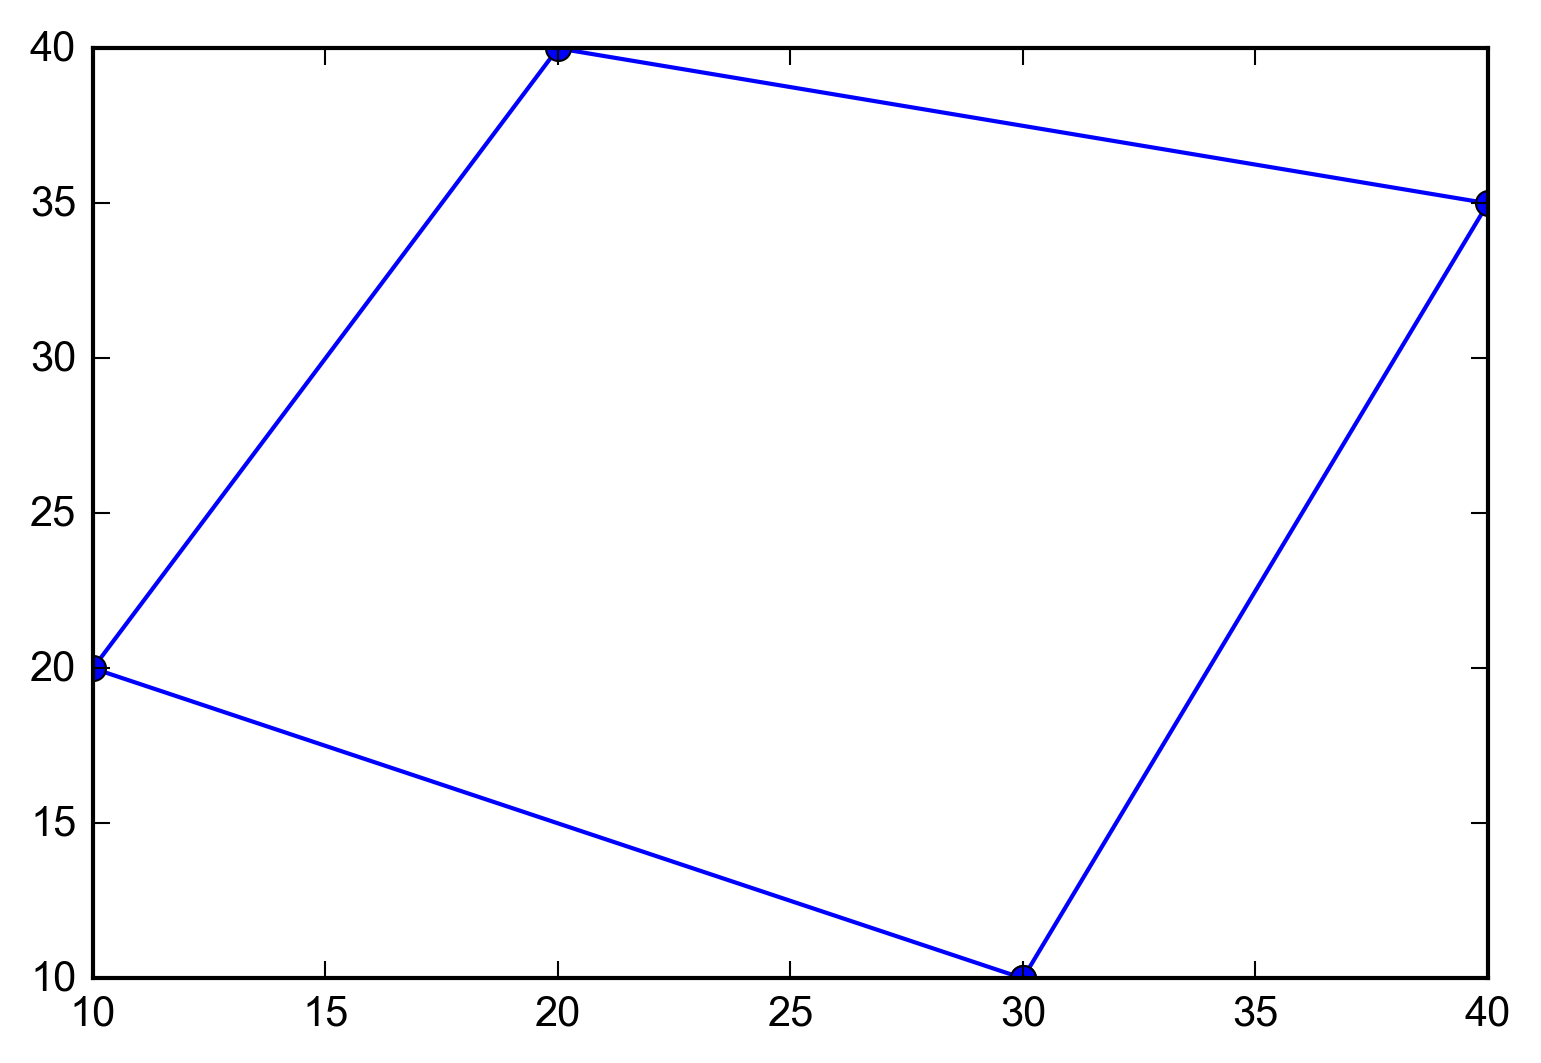

In [7]:
from shapely.wkt import loads
geom = loads("POLYGON ((30 10, 40 35, 20 40, 10 20, 30 10))")
x, y = geom.exterior.xy
plt.plot(x, y, ls = '-', marker = 'o')

# CHECK  POINT

What should the bounding box be as a WKT Polygon?

# ANSWERS Hidden

<div class="answers">

"POLYGON ((llcrnrlon llcrnrlat, lrcrnrlon lrcrnrlat, urcrnrlon urcrnrlat, ulcrnrlon ulcrnrlat, llcrnrlon llcrnrlat))"

</div>

# Window observations

In [17]:
from PseudoNetCDF import PNC
aqsncpath = 'aqs.nc'
os.remove(aqsncpath)
aqsargs = PNC('gen', '-O',
   '--format=aqsraw,bdate="2006-08-01",edate="2006-08-01",wktpolygon="POLYGON ((-90 25, -75 25, -75 45, -90 45, -90 25))"',
   '--rename=v,Ozone,O3',
   aqspath, aqsncpath);

**PNC:/Users/barronh/Development/pseudonetcdf/src/PseudoNetCDF/pncparse.py:420:DtypeWarning:
  Columns (17,23) have mixed types. Specify dtype option on import or set low_memory=False.


In [18]:
from PseudoNetCDF import PNC
PNC("dump", "--header", "aqs.nc");

netCDF4._netCDF4.Dataset aqs.nc {
dimensions:
        time = UNLIMITED // (24 currently) 
        points = 518 ;
        LAY = 1 ;

variables:
        double time(time);
                time:standard_name = "time" ;
                time:units = "hours since 1900-01-01" ;
        float longitude(points);
                longitude:standard_name = "longitude" ;
                longitude:units = "degrees_east" ;
        float latitude(points);
                latitude:standard_name = "latitude" ;
                latitude:units = "degrees_north" ;
        float O3(time, LAY, points);
                O3:_FillValue = -999.0 ;
                O3:standard_name = "Ozone" ;
                O3:fill_value = -999.0 ;
                O3:units = "Parts per million" ;


// global properties:
                :SITENAMES = "010030010;010270001;010331002;010510001;010550011;010690004;010730023;010731003;010731005;010731009;010731010;010732006;010735002;010735003;010736002;010790002;010890014;010970003;0109

# Extract CMAQ at AQS

In [21]:
os.remove("cmaq_aqs_extract.nc")
PNC("gen", "-O", "--extract-file=aqs.nc",
    "--variables=O3", "--slice=LAY,0",
    "--from-conv=ioapi", aconcpath,
    "cmaq_aqs_extract.nc");

In [33]:
cmaqextract = PNC("--slice=LAY,0", "cmaq_aqs_extract.nc").ifiles[0]
cmaqextract

PseudoNetCDF.core._files.PseudoNetCDFFile unknown {
dimensions:
        TSTEP = UNLIMITED // (24 currently) 
        LAY = 1 ;
        points = 518 ;
        COL = 127 ;
        ROW = 122 ;
        VAR = 7 ;
        DATE-TIME = 2 ;
        nv = 4 ;
        tnv = 2 ;

variables:
        double time(TSTEP);
                time:long_name = "synthesized time coordinate from SDATE, STIME, STEP global attributes" ;
                time:bounds = "time_bounds" ;
                time:coordinates = "TSTEP" ;
                time:units = "seconds since 1970-01-01 00:00:00" ;
        float O3(TSTEP, LAY, points);
                O3:var_desc = "Variable O3                                                                     " ;
                O3:long_name = "O3              " ;
                O3:coordinates = "time level latitude longitude" ;
                O3:units = "ppmV            " ;
                O3:grid_mapping = "LambertConformalProjection" ;
        double layer(LAY);
                

# Python Evaluation

1. Read in files
2. Get variables
3. Calculate: Mean obs, mean pred, mean bias, root mean square error


In [39]:
aqsfile, cmaqfile = PNC("aqs.nc", "cmaq_aqs_extract.nc").ifiles
aqso3 = aqsfile.variables['O3'][:]
cmaqo3 = cmaqfile.variables['O3'][:]

bias = cmaqo3 - aqso3
rmseO3 = (bias**2).mean()**.5
print('MO', aqso3.mean())
print('MP', cmaqo3.mean())
print('MB', bias.mean())
print('RMSE', rmseO3)

MO 0.0354791925669
MP 0.0274811
MB -0.00798024894065
RMSE 0.0185395552126


# PNC Eval

In [35]:
from PseudoNetCDF import PNC
PNC("eval", "--variables=O3",
    "--funcs=NO,NP,NOP,MO,MP,MB,RMSE,IOA,AC",
    aqsncpath, 'cmaq_aqs_extract.nc');

# aqsnc_0 = ifile0 = aqs.nc
# cmaq_a_0 = ifile1 = cmaq_aqs_extract.nc
# ifile0=aqs.nc
# ifile1=cmaq_aqs_extract.nc
# Stats calculated as func(ifile0, ifile1)
# Generally: func(obs, mod, ....)
# Meta-data from aqs.nc
# Date Range: 2006-08-01 00:00:00 to 2006-08-01 23:00:00
# Longitude Range: -89.98783111572266 to -75.01155090332031
# Latitude Range: 25.586383819580078 to 44.70735168457031
# Meta-data from cmaq_aqs_extract.nc
# Date Range: 2006-08-01 00:00:00 to 2006-08-01 23:00:00
# Longitude Range: -90.02883287646353 to -75.33641820005224
# Latitude Range: 25.628315232511536 to 39.52255381919687
O3,N Observations (#),NO,11943.000000
O3,N Predictions (#),NP,12432.000000
O3,N Observations/Prediction Pairs (#),NOP,11943.000000
O3,Mean Observations (obs unit),MO,0.035479
O3,Mean Predictions (model unit),MP,0.027481
O3,Mean Bias,MB,-0.007980
O3,Root Mean Square Error (model unit),RMSE,0.018540
O3,Index of Agreement, IOA,IOA,0.757777
O3,Anomaly Correlation,AC,0.583813


# ANSWERS Hidden

<div class="answers">
```
from PseudoNetCDF import PNC, pnceval

aqs = PNC("--expr=O3=Ozone*1000", "AQS_DATA_20130501-20130701.nc")
geos = PNC("bpch_aqs_extract.nc")
aqso3 = aqs.ifiles[0].variables['O3'].reshape(2, 31, 1, 1295).mean(1)
geoso3 = geos.ifiles[0].variables['O3']
print(aqso3.shape)
print(geoso3.shape)
print(pnceval.RMSE(aqso3, geoso3, axis = 2))
```
</div>